# To make a suitable machine learning algorithm to predict if the mushroom is edible or poisonous (e or p) using the given dataset. Also, if some data pre-processing is necessary do that as well

In [1]:
#Importing the libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#importing the data set
data=pd.read_csv('mushrooms.csv')

In [3]:
data # to get an idea about the structure of the data set

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8119,e,k,s,n,f,n,a,c,b,y,...,s,o,o,p,o,o,p,b,c,l
8120,e,x,s,n,f,n,a,c,b,y,...,s,o,o,p,n,o,p,b,v,l
8121,e,f,s,n,f,n,a,c,b,n,...,s,o,o,p,o,o,p,b,c,l
8122,p,k,y,n,f,y,f,c,n,b,...,k,w,w,p,w,o,e,w,v,l


In [4]:
data.shape

(8124, 23)

In [5]:
data.dtypes

class                       object
cap-shape                   object
cap-surface                 object
cap-color                   object
bruises                     object
odor                        object
gill-attachment             object
gill-spacing                object
gill-size                   object
gill-color                  object
stalk-shape                 object
stalk-root                  object
stalk-surface-above-ring    object
stalk-surface-below-ring    object
stalk-color-above-ring      object
stalk-color-below-ring      object
veil-type                   object
veil-color                  object
ring-number                 object
ring-type                   object
spore-print-color           object
population                  object
habitat                     object
dtype: object

# checking for null values

In [12]:
data.isna().sum()

class                       0
cap-shape                   0
cap-surface                 0
cap-color                   0
bruises                     0
odor                        0
gill-attachment             0
gill-spacing                0
gill-size                   0
gill-color                  0
stalk-shape                 0
stalk-root                  0
stalk-surface-above-ring    0
stalk-surface-below-ring    0
stalk-color-above-ring      0
stalk-color-below-ring      0
veil-color                  0
ring-number                 0
ring-type                   0
spore-print-color           0
population                  0
habitat                     0
dtype: int64

In [13]:
data.describe(include='all')

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-above-ring,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-color,ring-number,ring-type,spore-print-color,population,habitat
count,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,...,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124
unique,2,6,4,10,2,9,2,2,2,12,...,4,4,9,9,4,3,5,9,6,7
top,e,x,y,n,f,n,f,c,b,b,...,s,s,w,w,w,o,p,w,v,d
freq,4208,3656,3244,2284,4748,3528,7914,6812,5612,1728,...,5176,4936,4464,4384,7924,7488,3968,2388,4040,3148


In [7]:
data.columns

Index(['class', 'cap-shape', 'cap-surface', 'cap-color', 'bruises', 'odor',
       'gill-attachment', 'gill-spacing', 'gill-size', 'gill-color',
       'stalk-shape', 'stalk-root', 'stalk-surface-above-ring',
       'stalk-surface-below-ring', 'stalk-color-above-ring',
       'stalk-color-below-ring', 'veil-type', 'veil-color', 'ring-number',
       'ring-type', 'spore-print-color', 'population', 'habitat'],
      dtype='object')

In [8]:
for i in data.columns:
    print(len(data[i].unique()),data.value_counts(i))
    print('-------------------')

2 class
e    4208
p    3916
dtype: int64
-------------------
6 cap-shape
x    3656
f    3152
k     828
b     452
s      32
c       4
dtype: int64
-------------------
4 cap-surface
y    3244
s    2556
f    2320
g       4
dtype: int64
-------------------
10 cap-color
n    2284
g    1840
e    1500
y    1072
w    1040
b     168
p     144
c      44
r      16
u      16
dtype: int64
-------------------
2 bruises
f    4748
t    3376
dtype: int64
-------------------
9 odor
n    3528
f    2160
s     576
y     576
a     400
l     400
p     256
c     192
m      36
dtype: int64
-------------------
2 gill-attachment
f    7914
a     210
dtype: int64
-------------------
2 gill-spacing
c    6812
w    1312
dtype: int64
-------------------
2 gill-size
b    5612
n    2512
dtype: int64
-------------------
12 gill-color
b    1728
p    1492
w    1202
n    1048
g     752
h     732
u     492
k     408
e      96
y      86
o      64
r      24
dtype: int64
-------------------
2 stalk-shape
t    4608
e    3516
dty

In [9]:
# from the above inference we can see veli-type contains only one feature value
# and also stalk root contains a '?' unknown character

In [10]:
data=data.drop('veil-type',axis=1)

In [11]:
#Stalk-root contains bulbous=b, club=c, cup=u, equal=e, rhizomorphs=z, rooted=r
# therefor filling the '?' with u or z

In [19]:
import random
data['stalk-root']=data['stalk-root'].replace(to_replace='?',value=random.choice(('u','z')))

In [20]:
data.value_counts('stalk-root')

stalk-root
b    3776
u    2480
e    1120
c     556
r     192
dtype: int64

# label encoding

In [21]:
from sklearn.preprocessing import LabelEncoder
label_en=LabelEncoder()
for i in data.columns:
    data[i]=label_en.fit_transform(data[i])

In [22]:
data

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-above-ring,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,1,5,2,4,1,6,1,0,1,4,...,2,2,7,7,2,1,4,2,3,5
1,0,5,2,9,1,0,1,0,0,4,...,2,2,7,7,2,1,4,3,2,1
2,0,0,2,8,1,3,1,0,0,5,...,2,2,7,7,2,1,4,3,2,3
3,1,5,3,8,1,6,1,0,1,5,...,2,2,7,7,2,1,4,2,3,5
4,0,5,2,3,0,5,1,1,0,4,...,2,2,7,7,2,1,0,3,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8119,0,3,2,4,0,5,0,0,0,11,...,2,2,5,5,1,1,4,0,1,2
8120,0,5,2,4,0,5,0,0,0,11,...,2,2,5,5,0,1,4,0,4,2
8121,0,2,2,4,0,5,0,0,0,5,...,2,2,5,5,1,1,4,0,1,2
8122,1,3,3,4,0,8,1,0,1,0,...,2,1,7,7,2,1,0,7,4,2


In [23]:
pa=pd.DataFrame(data['class'].value_counts())

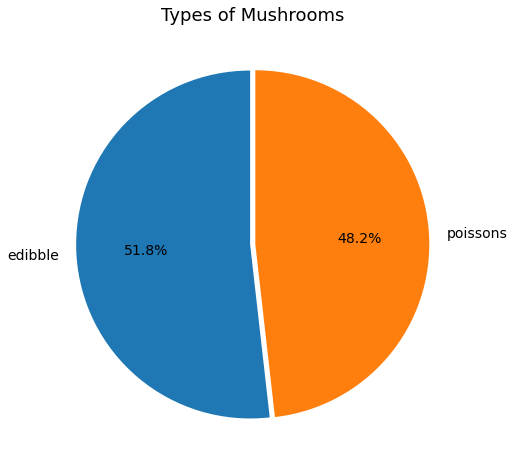

In [24]:
plt.figure(figsize=(10,8))
plt.pie(x='class',data=pa,labels=['edibble','poissons'],startangle=90,autopct='%1.1f%%',
        explode=(0.015,0.015),textprops={'fontsize': 14})
plt.title('Types of Mushrooms',fontsize=18)
plt.show()

from the pie chart we know that 52% is edible and 48% is poissons mushrooms

In [25]:
# splitting the dataset

In [26]:
x=data.drop(['class'],axis=1)
y=pd.DataFrame(data['class'])

In [31]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=42)

In [32]:
import warnings
warnings.filterwarnings('ignore')

# Gaussian Naive Bayes

In [33]:
from sklearn.naive_bayes import GaussianNB
classifier=GaussianNB()
classifier.fit(x_train,y_train)
y_pred=classifier.predict(x_test)

In [34]:
from sklearn.metrics import confusion_matrix,accuracy_score

In [30]:
cm=confusion_matrix(y_test,y_pred)
acc=accuracy_score(y_test,y_pred)
print("accuracy_score:",acc)
cm

accuracy_score: 0.9306808859721083


array([[1183,   74],
       [  95, 1086]], dtype=int64)

# Bernoulli Naive Bayes

In [35]:
from sklearn.naive_bayes import BernoulliNB
bnb=BernoulliNB()
bnb.fit(x_train,y_train)
y_pred=bnb.predict(x_test)

In [36]:
cm=confusion_matrix(y_test,y_pred)
acc=accuracy_score(y_test,y_pred)
print("accuracy_score:",acc)
cm

accuracy_score: 0.874487284659557


array([[1200,   57],
       [ 249,  932]], dtype=int64)

# Logistic Regression

In [37]:
from sklearn.linear_model import LogisticRegression
logit_model=LogisticRegression()
logit_model.fit(x_train,y_train)
y_pred=logit_model.predict(x_test)

In [38]:
print("accuracy is:",accuracy_score(y_test,y_pred))
confusion_matrix(y_test,y_pred)

accuracy is: 0.9528301886792453


array([[1200,   57],
       [  58, 1123]], dtype=int64)

# KNN

In [39]:
from sklearn.neighbors import KNeighborsClassifier
acc_values=[]
neighbors=np.arange(1,10)
for k in neighbors:
    classifier=KNeighborsClassifier(n_neighbors=k,metric='minkowski')
    classifier.fit(x_train,y_train)
    y_pred=classifier.predict(x_test)
    acc=accuracy_score(y_test,y_pred)
    acc_values.append(acc)

Text(0, 0.5, 'accuracy')

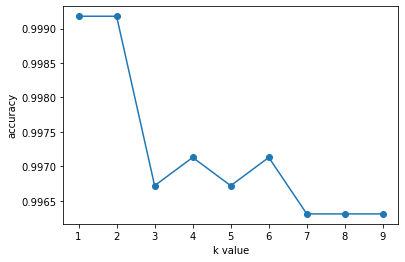

In [40]:
plt.plot(neighbors,acc_values,'o-')
plt.xlabel('k value')
plt.ylabel('accuracy')

In [41]:
classifier=KNeighborsClassifier(n_neighbors=2,metric='minkowski')
classifier.fit(x_train,y_train)
y_pred=classifier.predict(x_test)

In [42]:
print("accuracy is:",accuracy_score(y_test,y_pred))
confusion_matrix(y_test,y_pred)

accuracy is: 0.9991796554552912


array([[1255,    2],
       [   0, 1181]], dtype=int64)

# Decision Tree Classifier

In [43]:
from sklearn.tree import DecisionTreeClassifier
dt_model=DecisionTreeClassifier()
dt_model.fit(x_train,y_train)
y_pred=dt_model.predict(x_test)

In [44]:
print("accuracy is:",accuracy_score(y_test,y_pred))
confusion_matrix(y_test,y_pred)

accuracy is: 1.0


array([[1257,    0],
       [   0, 1181]], dtype=int64)

# Random Forest Classifier

In [45]:
from sklearn.ensemble import RandomForestClassifier
rf=RandomForestClassifier()
rf.fit(x_train,y_train)
y_pred=rf.predict(x_test)

In [46]:
print("accuracy is:",accuracy_score(y_test,y_pred))
confusion_matrix(y_test,y_pred)

accuracy is: 1.0


array([[1257,    0],
       [   0, 1181]], dtype=int64)

# Linear SVM

In [47]:
from sklearn.svm import SVC
svm_linear=SVC(kernel='linear')
svm_linear.fit(x_train,y_train)
y_pred=svm_linear.predict(x_test)

In [48]:
print("accuracy is:",accuracy_score(y_test,y_pred))
confusion_matrix(y_test,y_pred)

accuracy is: 0.9659557013945858


array([[1207,   50],
       [  33, 1148]], dtype=int64)

# Radial SVM

In [49]:
svm_radial=SVC(kernel='rbf')
svm_radial.fit(x_train,y_train)
y_pred=svm_radial.predict(x_test)

In [50]:
print("accuracy is:",accuracy_score(y_test,y_pred))
confusion_matrix(y_test,y_pred)

accuracy is: 0.9967186218211649


array([[1257,    0],
       [   8, 1173]], dtype=int64)

# Polynomial SVM

In [51]:
svm_poly=SVC(kernel='poly',degree=3)
svm_poly.fit(x_train,y_train)
y_pred=svm_poly.predict(x_test)

In [52]:
print("accuracy is:",accuracy_score(y_test,y_pred))
confusion_matrix(y_test,y_pred)

accuracy is: 1.0


array([[1257,    0],
       [   0, 1181]], dtype=int64)

from the above models we are getting 100% accuracy for Polynomial SVM, Decision Tree classifier and Random forest classifier
Therefor we can use these models to predict if the Mushrooms are edible or poissonous
 